In [365]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt,joblib
from scipy.stats import zscore

#Imputer
from sklearn.impute import SimpleImputer

#Encoder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#PowerTransformer
from sklearn.preprocessing import PowerTransformer

#Scaler
from sklearn.preprocessing import MinMaxScaler

#TrainTestSplit
from sklearn.model_selection import train_test_split


#ClassificationModels
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Optimizer
from sklearn.model_selection import GridSearchCV,cross_val_score

#Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,average_precision_score
from sklearn.metrics import adjusted_mutual_info_score,balanced_accuracy_score,roc_curve,auc

#Deep Learning
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [366]:
df = pd.read_csv(r'C:\Users\rjhcl\Desktop\Loan application status prediction\loan_prediction.csv')

In [367]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [368]:
df.isnull().sum()
# we have null values in gender, married, dependents, self_employed, loanAmount, Loan_amount_term, credit_history

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [369]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [370]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [371]:
# we are going to clear all the null values in gender to male as its the most frequent gender
imputer=SimpleImputer(strategy='most_frequent')
df['Gender']=imputer.fit_transform(df['Gender'].values.reshape(-1,1))

In [372]:
imputer=SimpleImputer(strategy='most_frequent')
df['Self_Employed']=imputer.fit_transform(df['Self_Employed'].values.reshape(-1,1))

In [373]:
imputer=SimpleImputer(strategy='most_frequent')
df['Loan_Amount_Term']=imputer.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))

In [374]:
imputer=SimpleImputer(strategy='most_frequent')
df['Credit_History']=imputer.fit_transform(df['Credit_History'].values.reshape(-1,1))

In [375]:
imputer=SimpleImputer(strategy='mean')
df['LoanAmount']=imputer.fit_transform(df['LoanAmount'].values.reshape(-1,1))

In [376]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [377]:
#We will do EDA to check more on filling positions of Dependants
df[df['Dependents'].isna()]['Married'].value_counts()

Yes    8
No     4
Name: Married, dtype: int64

In [378]:
df[df['Married']=='No']['Dependents'].value_counts()
#As we can see for most of the people who are not married does not have any dependents/0 dependents 

0     171
1      23
2       8
3+      7
Name: Dependents, dtype: int64

In [379]:
df['Married']=df['Married'].replace(np.nan,'Yes')

In [380]:
df['Dependents']=df['Dependents'].replace(np.nan,'Null')

In [381]:
def fill_dep(marr,dep):
    if dep=='Null':
        if marr=='No':
            return '0'
        else:
            return dep
    else:
        return dep

In [382]:
df['Dependents']=df.apply(lambda x:fill_dep(x['Married'],x['Dependents']),axis=1)

In [383]:
df['Dependents']=df['Dependents'].replace('Null','0')

In [384]:
df=df.drop('Loan_ID',axis=1)

In [385]:
# encoding gender
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [386]:
df['Married']

0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object

In [387]:
le=LabelEncoder()
df['Married']=le.fit_transform(df['Married'])

In [388]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [389]:
le=LabelEncoder()
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

In [390]:
#Check Skewness
df.skew()

Gender              -1.648795
Married             -0.644850
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [391]:
pt=PowerTransformer()

In [392]:
df['Dependents'].rename(index = {"3+": "3"},
                                 inplace = True)

In [393]:
df['Dependents']

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

<AxesSubplot:xlabel='Gender', ylabel='count'>

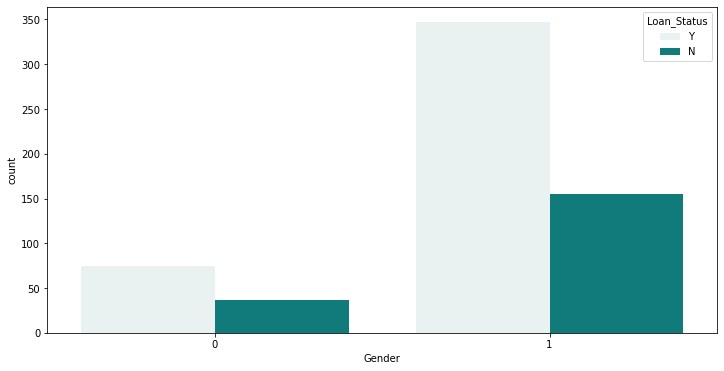

In [394]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Gender' , hue = 'Loan_Status' , data = df , dodge = True , color = 'darkcyan')

#### we can observe that most of the people who are getting loans are males

<AxesSubplot:xlabel='Married', ylabel='count'>

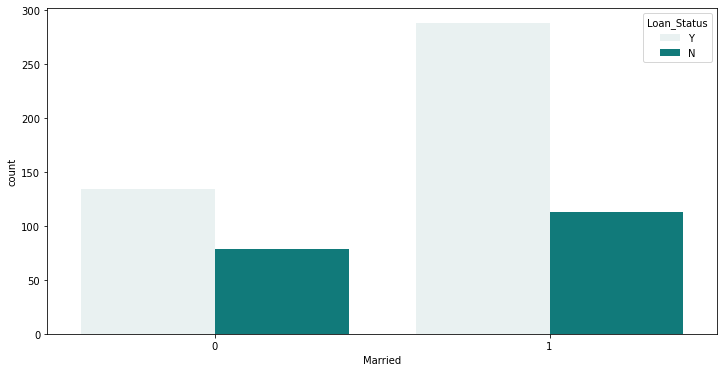

In [395]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Married' , hue = 'Loan_Status' , data = df , dodge = True , color = 'darkcyan')

#### from the above plot we can say that most of the people who married are getting loans

<AxesSubplot:xlabel='Dependents', ylabel='count'>

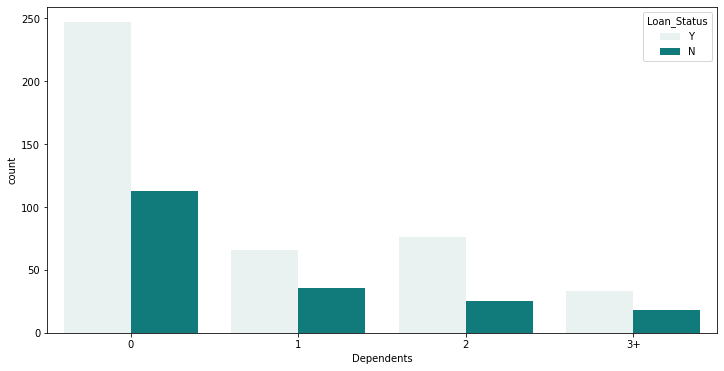

In [396]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Dependents' , hue = 'Loan_Status' , data = df , dodge = True , color = 'darkcyan')

#### from the above plot we can observe that most of the people who have less dependents are getting loans

<AxesSubplot:xlabel='Education', ylabel='count'>

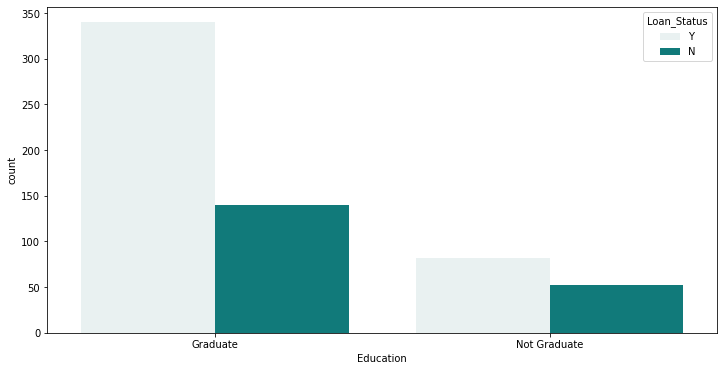

In [397]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Education' , hue = 'Loan_Status' , data = df , dodge = True , color = 'darkcyan')

#### from the above plot we can observe that most of the people who are graduated are getting loans

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

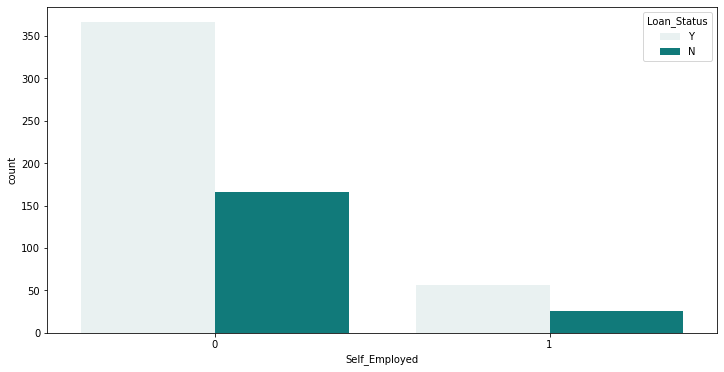

In [398]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Self_Employed' , hue = 'Loan_Status' , data = df , dodge = True , color = 'darkcyan')

#### from the above plot we can say that most of them are not self employed

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

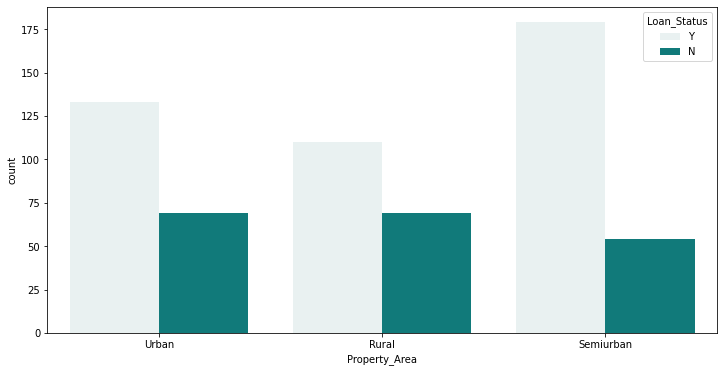

In [399]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Property_Area' , hue = 'Loan_Status' , data = df , dodge = True , color = 'darkcyan')

#### from the above plot we can say that most of them are from semi urban

<AxesSubplot:>

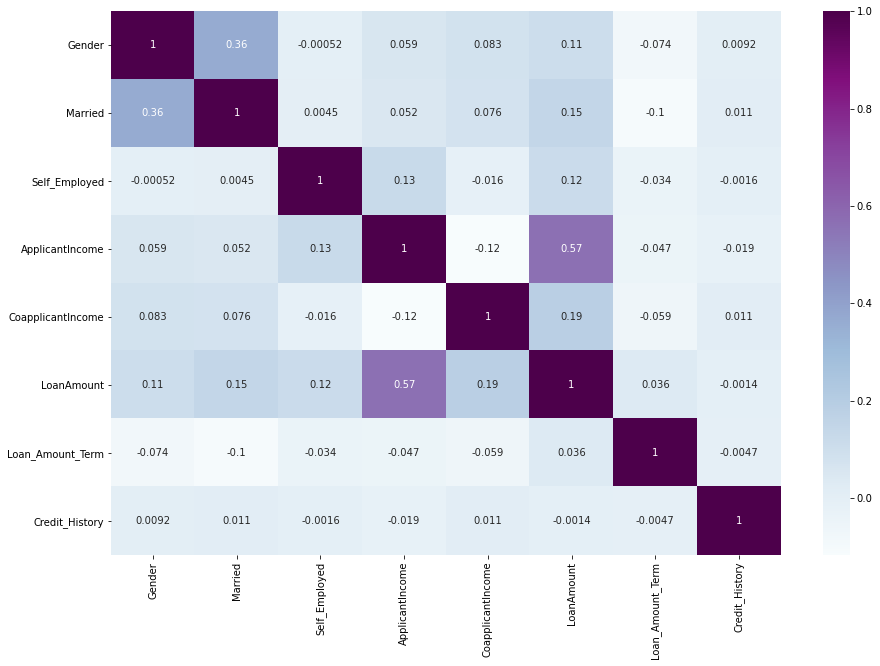

In [400]:
#correlation with heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')

In [401]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,1,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,1,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,1,0,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,Graduate,0,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,1,1,3+,Graduate,0,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,1,1,1,Graduate,0,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,1,1,2,Graduate,0,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [402]:
df.fillna(df.mean())

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,1,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,1,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,1,0,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,Graduate,0,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,1,1,3+,Graduate,0,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,1,1,1,Graduate,0,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,1,1,2,Graduate,0,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [403]:
cat_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [404]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [405]:
z_score = np.abs(zscore(df))

In [406]:
scale=MinMaxScaler()
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']
X=scale.fit_transform(X)

In [407]:
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=x)
        md=model
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
        fpr,tpr,thresholds=roc_curve(y_test,predict)
        acurve=auc(fpr,tpr)
#         f1=f1_score(y_test,predict)
        acc=accuracy_score(y_test,predict)
#         avg=(confusion_matrix(y_test,predict)[0,0]+confusion_matrix(y_test,predict)[1,1])/(confusion_matrix(y_test,predict)[0,1]+confusion_matrix(y_test,predict)[1,0])
        if acc>max_score:
            max_score=acc
            max_state=x
    print("Max score is {} with random state {}".format(max_score,max_state))

In [408]:
model_select(LogisticRegression(max_iter=4000))

Max score is 0.8594594594594595 with random state 63


In [409]:
model_select(KNeighborsClassifier())

Max score is 0.8486486486486486 with random state 73


In [410]:
model_select(SVC())

Max score is 0.8594594594594595 with random state 63


In [411]:
model_select(DecisionTreeClassifier())

Max score is 0.7567567567567568 with random state 72


In [412]:
model_select(RandomForestClassifier())

Max score is 0.8432432432432433 with random state 73


In [413]:
model_select(AdaBoostClassifier())

Max score is 0.8432432432432433 with random state 77


In [414]:
model_select(GaussianNB())

Max score is 0.8540540540540541 with random state 104


In [415]:
model_select(BaggingClassifier())

Max score is 0.827027027027027 with random state 69


In [416]:
model_select(GradientBoostingClassifier())

Max score is 0.8216216216216217 with random state 64


In [417]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=64)
model=LogisticRegression(max_iter=4000,solver='liblinear')
model.fit(X_train,y_train)
predict=model.predict(X_test)

In [418]:
print(confusion_matrix(y_test,predict))
print()
print(classification_report(y_test,predict))

[[ 25  31]
 [  0 129]]

              precision    recall  f1-score   support

           0       1.00      0.45      0.62        56
           1       0.81      1.00      0.89       129

    accuracy                           0.83       185
   macro avg       0.90      0.72      0.76       185
weighted avg       0.86      0.83      0.81       185



In [419]:
param={'C':[0.1,0.3,0.5,0.7,0.9,1]}
gscv=GridSearchCV(LogisticRegression(max_iter=4000),param_grid=param)

In [420]:
gscv.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=4000),
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1]})

In [421]:
model=LogisticRegression(max_iter=4000,C=0.3)
model.fit(X_train,y_train)
predict=model.predict(X_test)

In [422]:
print(confusion_matrix(y_test,predict))
print()
print(classification_report(y_test,predict))

[[ 25  31]
 [  0 129]]

              precision    recall  f1-score   support

           0       1.00      0.45      0.62        56
           1       0.81      1.00      0.89       129

    accuracy                           0.83       185
   macro avg       0.90      0.72      0.76       185
weighted avg       0.86      0.83      0.81       185



In [423]:
joblib.dump(model,'Loan Status.obj')

['Loan Status.obj']